# Objective
What patterns can be discovered in customer use of the book subscription platform based on the event time and event type?



•account_id: This column contains a unique identifier for each user who performed an event.

• event_time: This column indicates the time at which each event occurred. The times are given in a format that includes hours, minutes, and seconds.

• event_type: This column specifies the type of event that occurred.

Examples of possible event types in this table are:


• DashboardLivebookLinkOpened: A user opened a link to a livebook from their dashboard.

• ReadingOwnedBook: A user started or continued reading a book they own.

• ProductTocLivebookLinkOpened: A user opened a link to a livebook from a product table of contents.

• ReadingOpenChapter: A user opened a specific chapter of a book they are reading.

• product_id: This corresponds with the event_type.

• additional_data: This metric may not be needed in this project

# Load Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [69]:
df= pd.read_csv("actions2load.csv")
df.head()


,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_time       object
 2   event_type       object
 3   product_id       int64 
 4   additional_data  object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


# Data Preprocessing

In [71]:
#Data Preprocessing
#convert into datetime
df["event_time"] = pd.to_datetime(df["event_time"])


#engineer some features
df['year']= df['event_time'].dt.year
df['month']= df['event_time'].dt.month
df['day']= df['event_time'].dt.day
df['hour']= df['event_time'].dt.hour
df['week_of_year'] = df['event_time'].dt.week
df['day_of_week'] = df['event_time'].dt.dayofweek







In [72]:
df

,account_id,event_time,event_type,product_id,additional_data,year,month,day,hour,week_of_year,day_of_week
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,2019,11,29,12,48,4
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,2019,11,29,12,48,4
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,2019,11,29,12,48,4
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,2019,11,29,12,48,4
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,2019,11,29,12,48,4
...,...,...,...,...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1,https://www.manning.com/books/bdd-in-action-se...,2020,6,4,4,23,3
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1,https://www.manning.com/books/bdd-in-action-se...,2020,6,4,4,23,3
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1,https://www.google.com/,2020,6,4,4,23,3
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1,https://www.google.com/,2020,6,4,4,23,3


In [73]:
#convert the event_time to the index of the dataframe ,easier for EDA and time series analysis
df = df.set_index('event_time')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3242076 entries, 2019-11-29 12:10:08.154000 to 2020-06-04 04:20:13.271000
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_type       object
 2   product_id       int64 
 3   additional_data  object
 4   year             int64 
 5   month            int64 
 6   day              int64 
 7   hour             int64 
 8   week_of_year     int64 
 9   day_of_week      int64 
dtypes: int64(7), object(3)
memory usage: 272.1+ MB


# Data Cleaning

In [75]:
# Are there any gaps(missing data) in the record of any events?
df.isnull().sum()

account_id              0
event_type              0
product_id              0
additional_data    516123
year                    0
month                   0
day                     0
hour                    0
week_of_year            0
day_of_week             0
dtype: int64

In [76]:
#Correct any missing data/gaps and redundant columns

col=["product_id","additional_data"]
df.drop(col,axis=1,inplace=True)

We dropped product_id because it was redundant/irrelevant and additional data had a lot of missing values

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3242076 entries, 2019-11-29 12:10:08.154000 to 2020-06-04 04:20:13.271000
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   account_id    object
 1   event_type    object
 2   year          int64 
 3   month         int64 
 4   day           int64 
 5   hour          int64 
 6   week_of_year  int64 
 7   day_of_week   int64 
dtypes: int64(6), object(2)
memory usage: 222.6+ MB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3242076.0,2019.906411,0.291256,2019.0,2020.0,2020.0,2020.0,2020.0
month,3242076.0,4.458935,2.708621,1.0,3.0,4.0,5.0,12.0
day,3242076.0,16.172553,8.836283,1.0,9.0,17.0,24.0,31.0
hour,3242076.0,12.020000,6.543222,0.0,7.0,13.0,17.0,23.0
week_of_year,3242076.0,17.668601,11.479917,1.0,12.0,16.0,20.0,52.0
day_of_week,3242076.0,2.809230,1.975963,0.0,1.0,3.0,4.0,6.0


# Exploratory Data Analysis & Data Visualization.

In [79]:
event=df['event_type'].value_counts().sort_values(ascending=False)
print(event)

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

### Takeaways:
    1.ReadingOwnedBook is the highest event type of subscribers while CommentCreated is the least

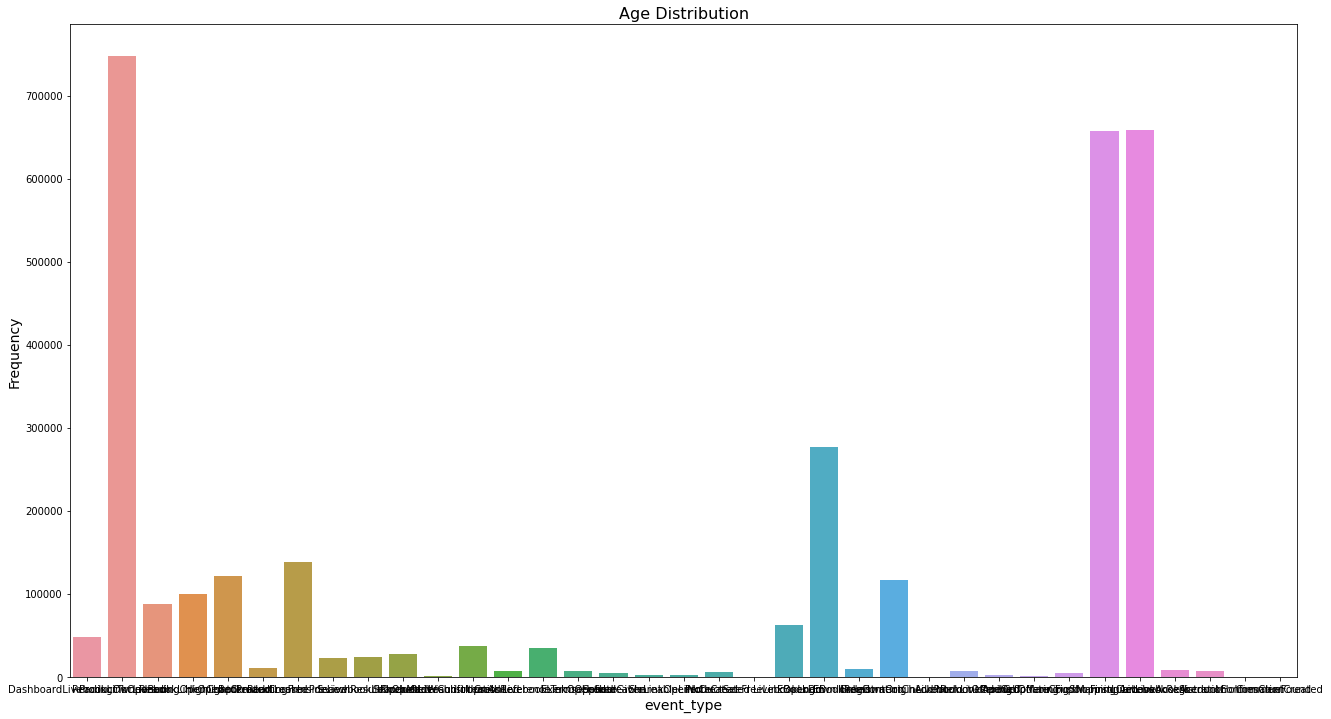

In [80]:
# Top event type
plt.figure(figsize=(22,18))
sns.countplot(x=df['event_type'])
plt.xlabel('event_type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)
plt.show()

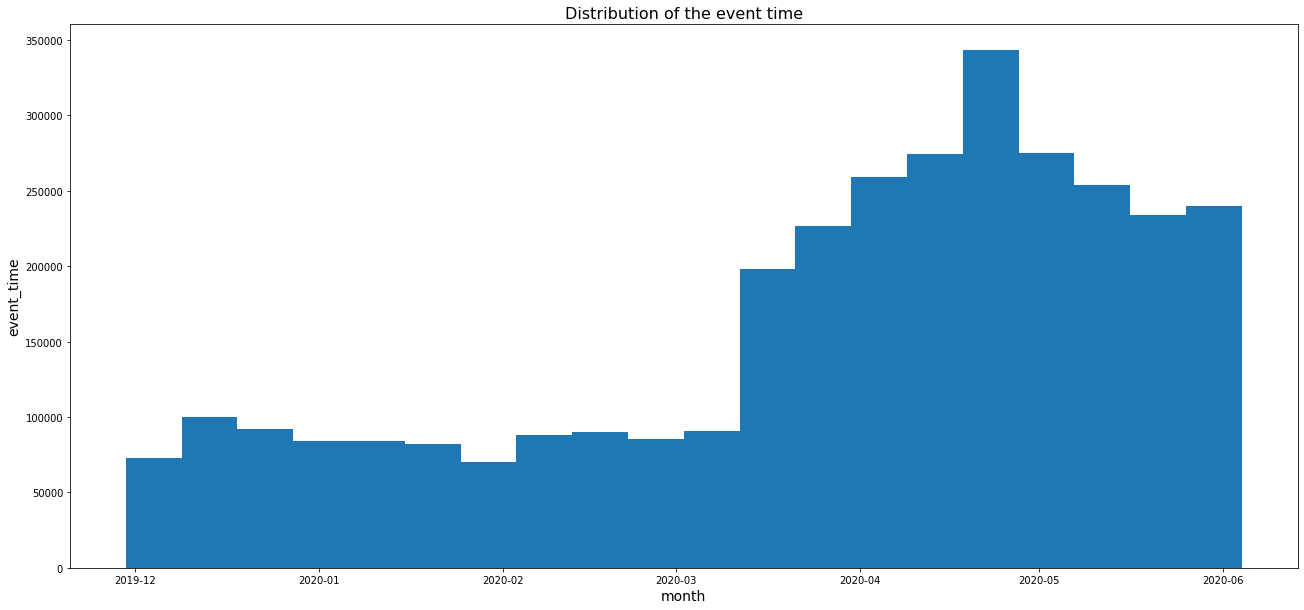

In [81]:
plt.figure(figsize=(22,10))
plt.hist(df.index, bins=20)

plt.xlabel('month', fontsize=14)
plt.ylabel('event_time', fontsize=14)
plt.title('Distribution of the event time', fontsize=16)
plt.show()


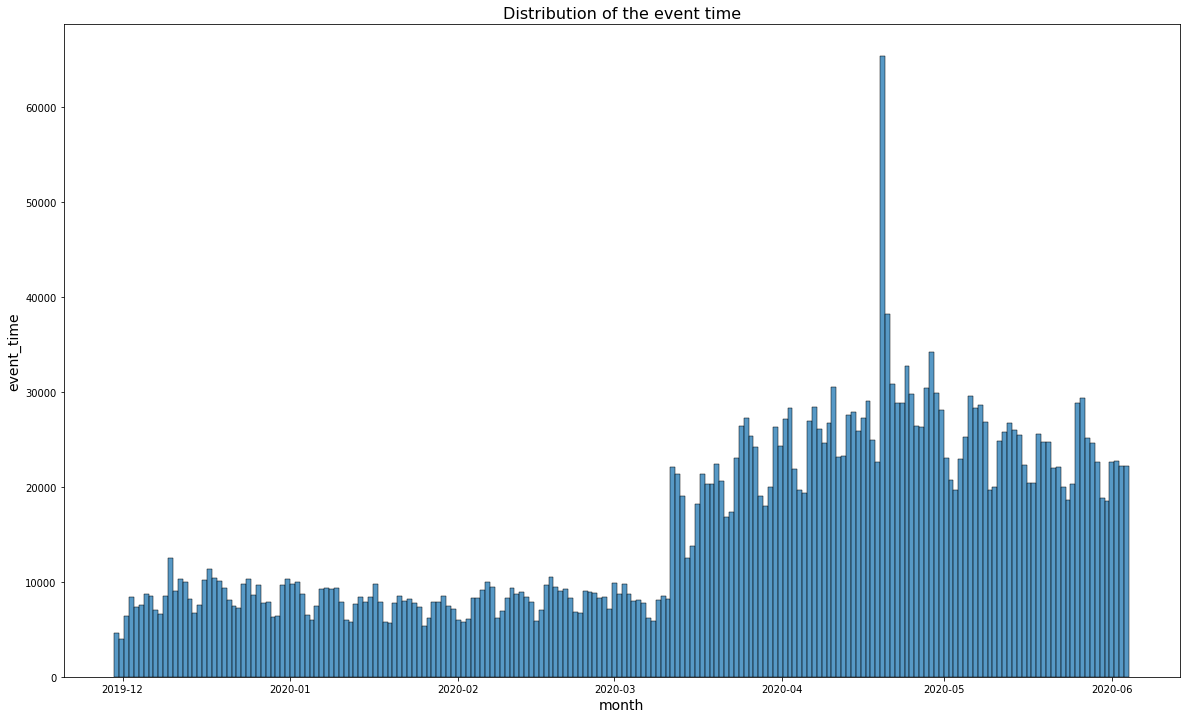

In [82]:
plt.figure(figsize=(20,12))
sns.histplot(x=df.index)

plt.xlabel('month', fontsize=14)
plt.ylabel('event_time', fontsize=14)
plt.title('Distribution of the event time', fontsize=16)

plt.show()

Most activity of the data occured more in the seconnd quarter of the year between April and June

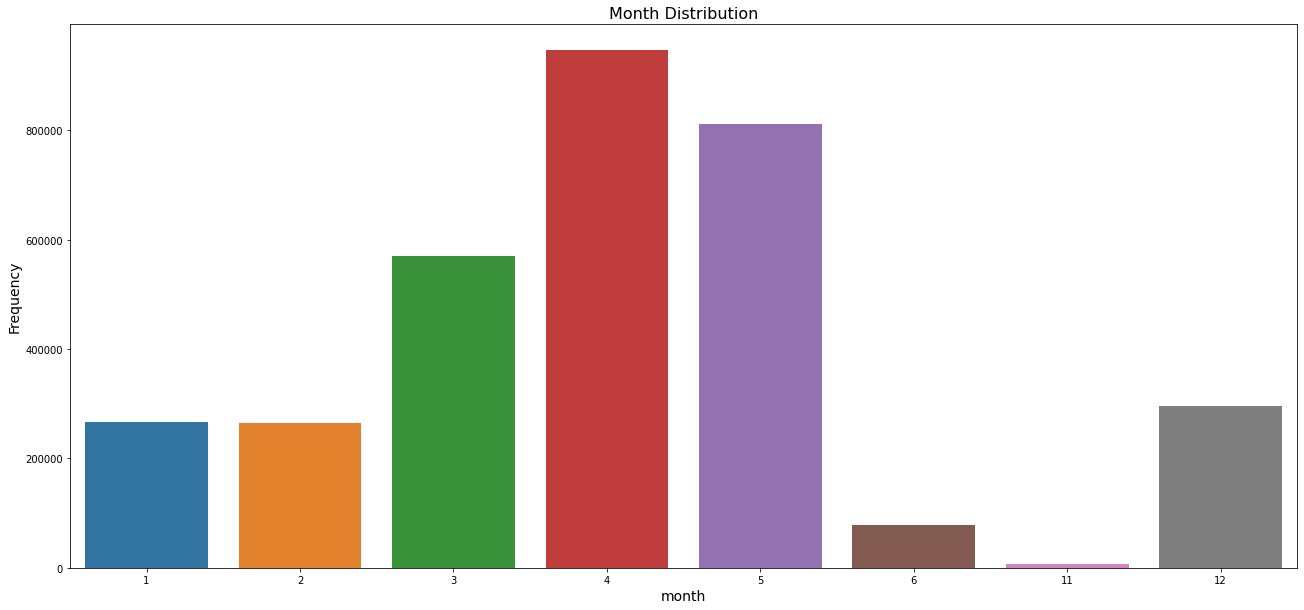

In [83]:
plt.figure(figsize=(22,10))
sns.countplot(x=df['month'])

plt.xlabel('month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Month Distribution', fontsize=16)
plt.show()

April has the highest month of activites while November has the least

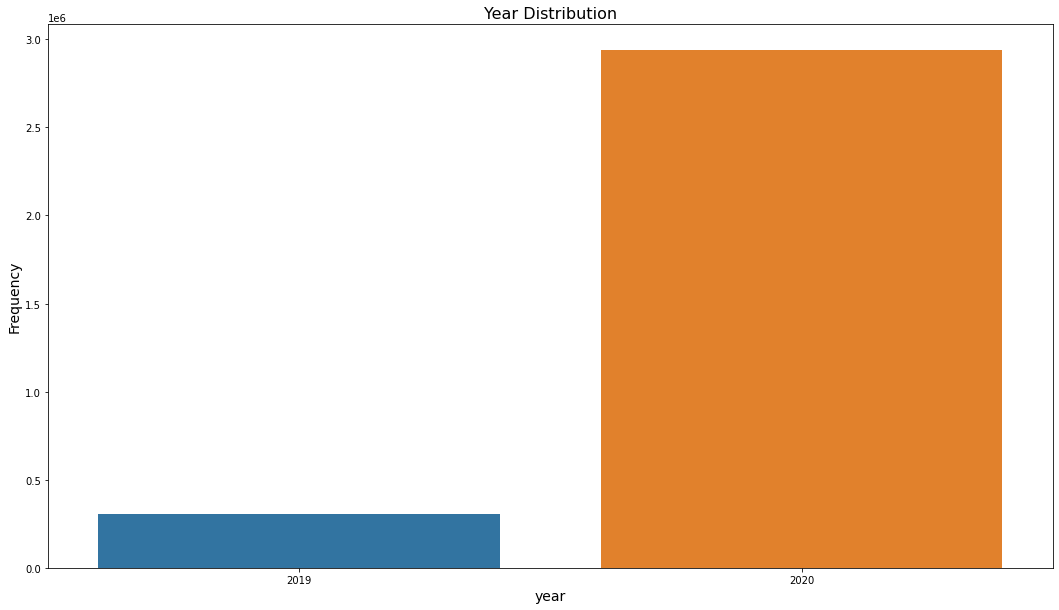

In [84]:
plt.figure(figsize=(18,10))
sns.countplot(x=df['year'])

plt.xlabel('year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Year Distribution', fontsize=16)
plt.show()

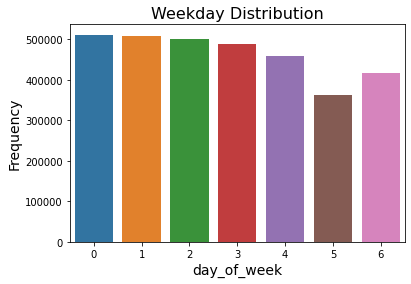

In [85]:
sns.countplot(x=df['day_of_week'])
plt.xlabel('day_of_week', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Weekday Distribution', fontsize=16)
plt.show()

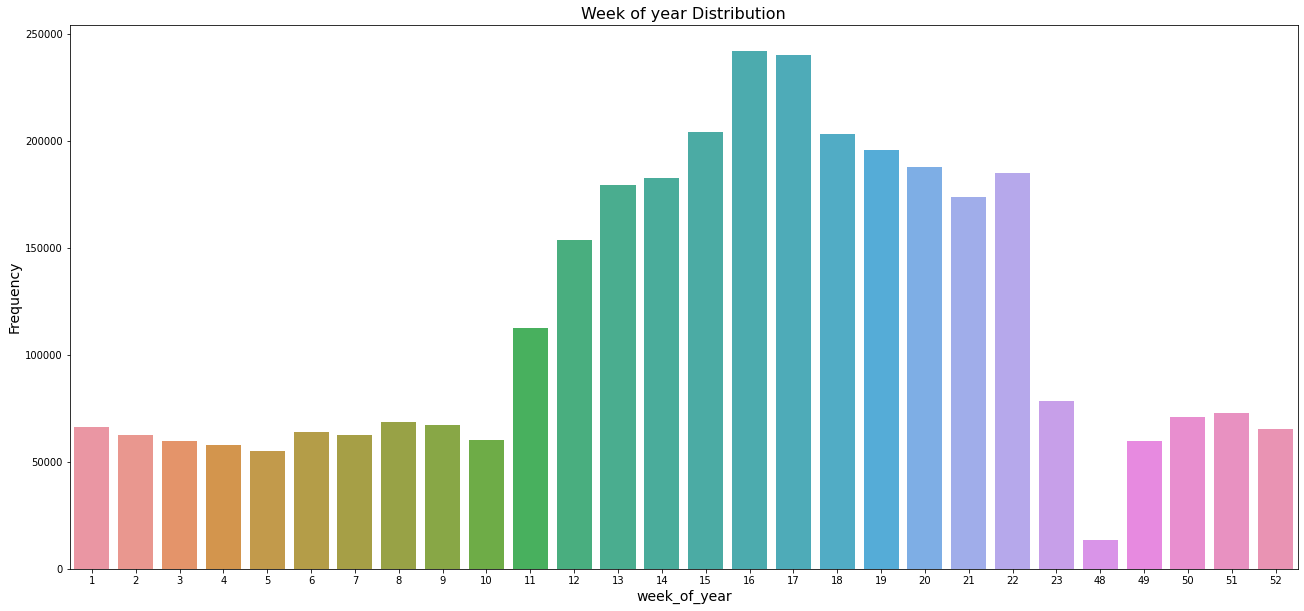

In [86]:
plt.figure(figsize=(22,10))
sns.countplot(x=df['week_of_year'])
plt.xlabel('week_of_year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Week of year Distribution', fontsize=16)
plt.show()


# • Are there any extreme outliers (class imbalances) in the number of events?


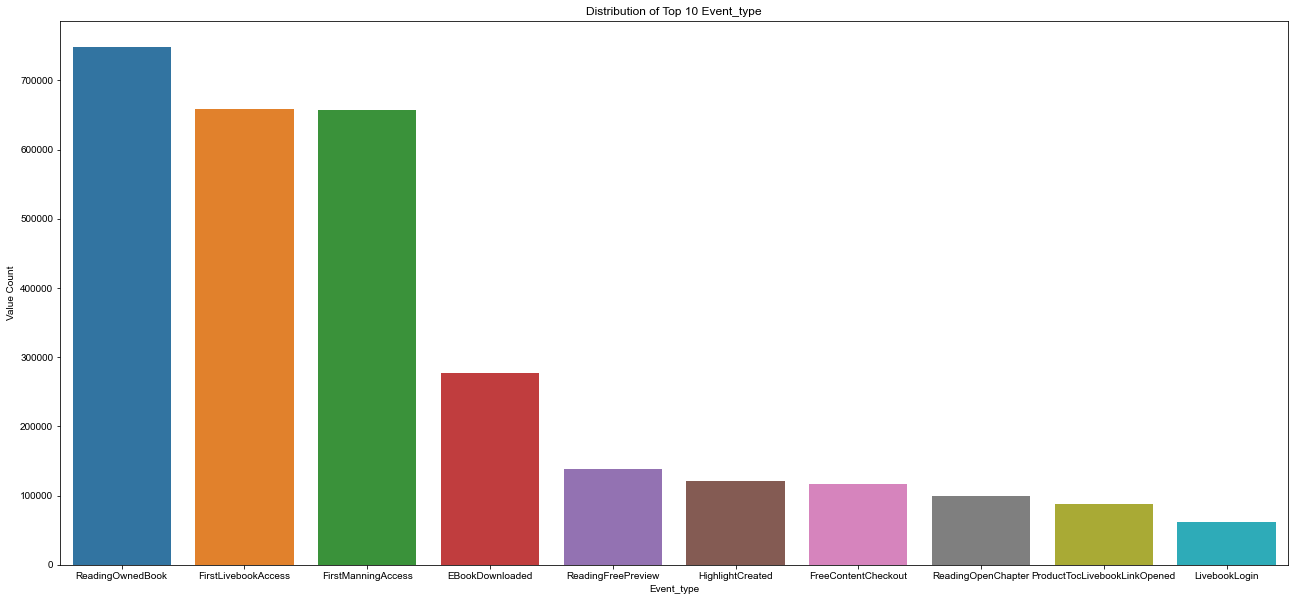

In [87]:
value_counts = df["event_type"].value_counts()

# Select the top 10 most frequent values
top_10 = value_counts.nlargest(10)


# Plot the distribution of the top 10 values using Seaborn
plt.figure(figsize=(22,10))

sns.barplot(x=top_10.index, y=top_10.values)
sns.set_style('whitegrid')
plt.title('Distribution of Top 10 Event_type')
plt.xlabel('Event_type')
plt.ylabel('Value Count')
plt.show()


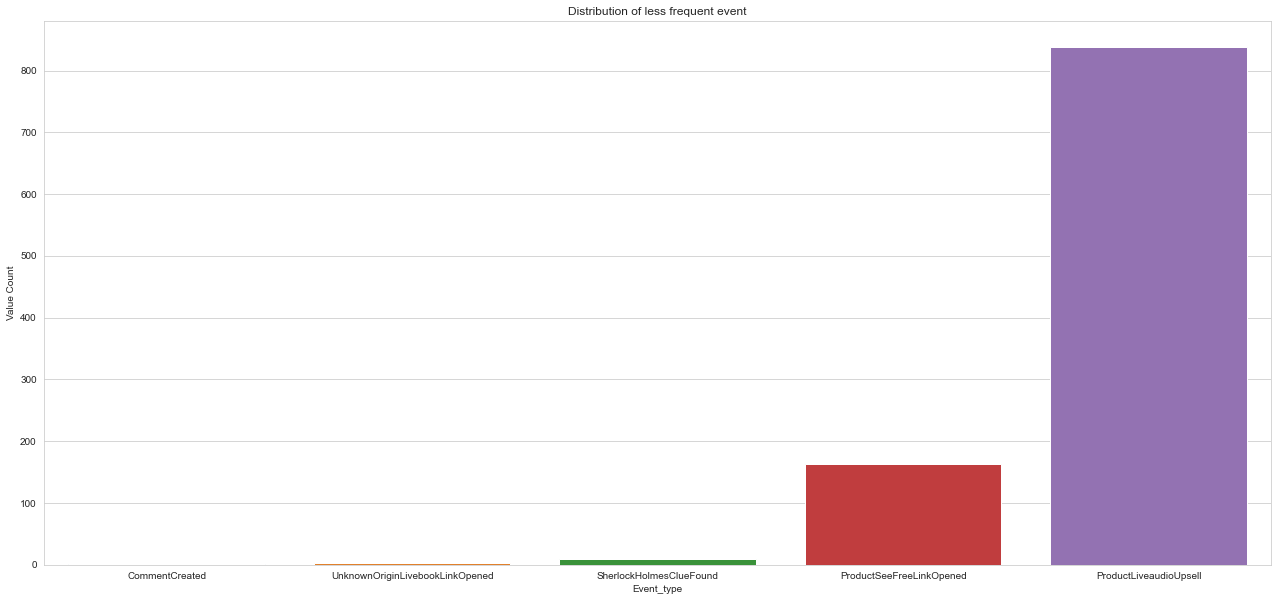

In [88]:
# Select the top 5 less frequent events
bottom_10 = value_counts.nsmallest(5)


plt.figure(figsize=(22,10))

sns.barplot(x=bottom_10.index, y=bottom_10.values)
sns.set_style('whitegrid')
plt.title('Distribution of less frequent event')
plt.xlabel('Event_type')
plt.ylabel('Value Count')
plt.show()

# Do events happen equally at different times of the day or are there patterns (give visualizations)?

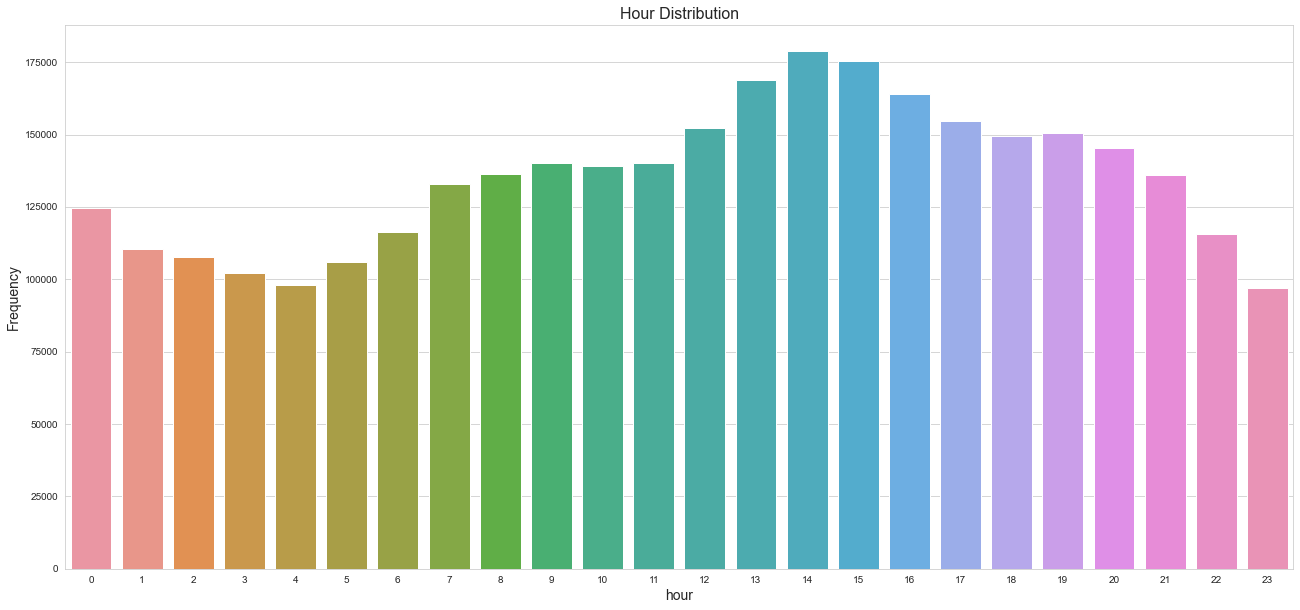

In [89]:
plt.figure(figsize=(22,10))

sns.countplot(x=df['hour'])
plt.xlabel('hour', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Hour Distribution', fontsize=16)
plt.show()

the activities are distributed but most activities happens around 2pm and 3pm, subscribers engage more in the afternoon than in the morning

# Analysis of  “a particular account_id” for insights on how the person uses the service at different times of the day?

In [90]:
df.columns

Index(['account_id', 'event_type', 'year', 'month', 'day', 'hour',
       'week_of_year', 'day_of_week'],
      dtype='object')

<AxesSubplot:xlabel='event_type', ylabel='hour'>

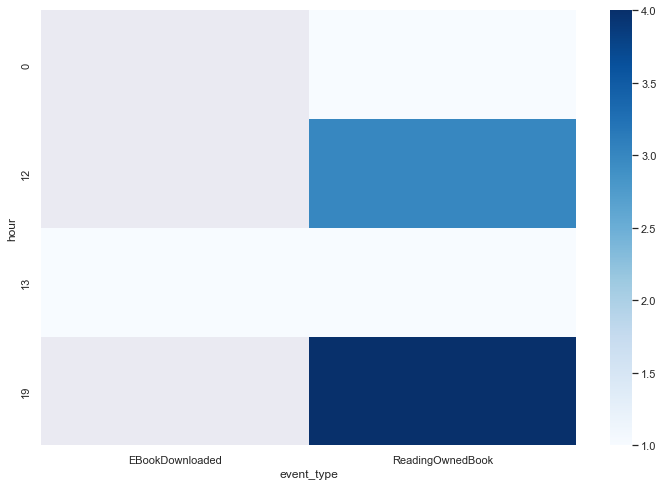

In [91]:
account_id = 'eaecfa7b11e62308832d07ac94dcda6a' # replace with the desired account_id
account_data = df[df['account_id'] == account_id]

account_usage = (account_data
                 .groupby(['hour', 'event_type'])
                 .agg(count=('event_type', 'count'))
                 .reset_index())


import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(account_usage.pivot('hour', 'event_type', 'count'), cmap='Blues')


#This will create a heatmap showing the usage of the different event types for the particular account_id at different hours of the day.
#The darker the color, the higher the usage.
#You can adjust the figure size and colormap to your liking.

subscriber has only two event type , Ebook downloaded and Reading Owned book

subscriber usually reads owned book in the evening around 7pm and 12pm

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3242076 entries, 2019-11-29 12:10:08.154000 to 2020-06-04 04:20:13.271000
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   account_id    object
 1   event_type    object
 2   year          int64 
 3   month         int64 
 4   day           int64 
 5   hour          int64 
 6   week_of_year  int64 
 7   day_of_week   int64 
dtypes: int64(6), object(2)
memory usage: 302.6+ MB


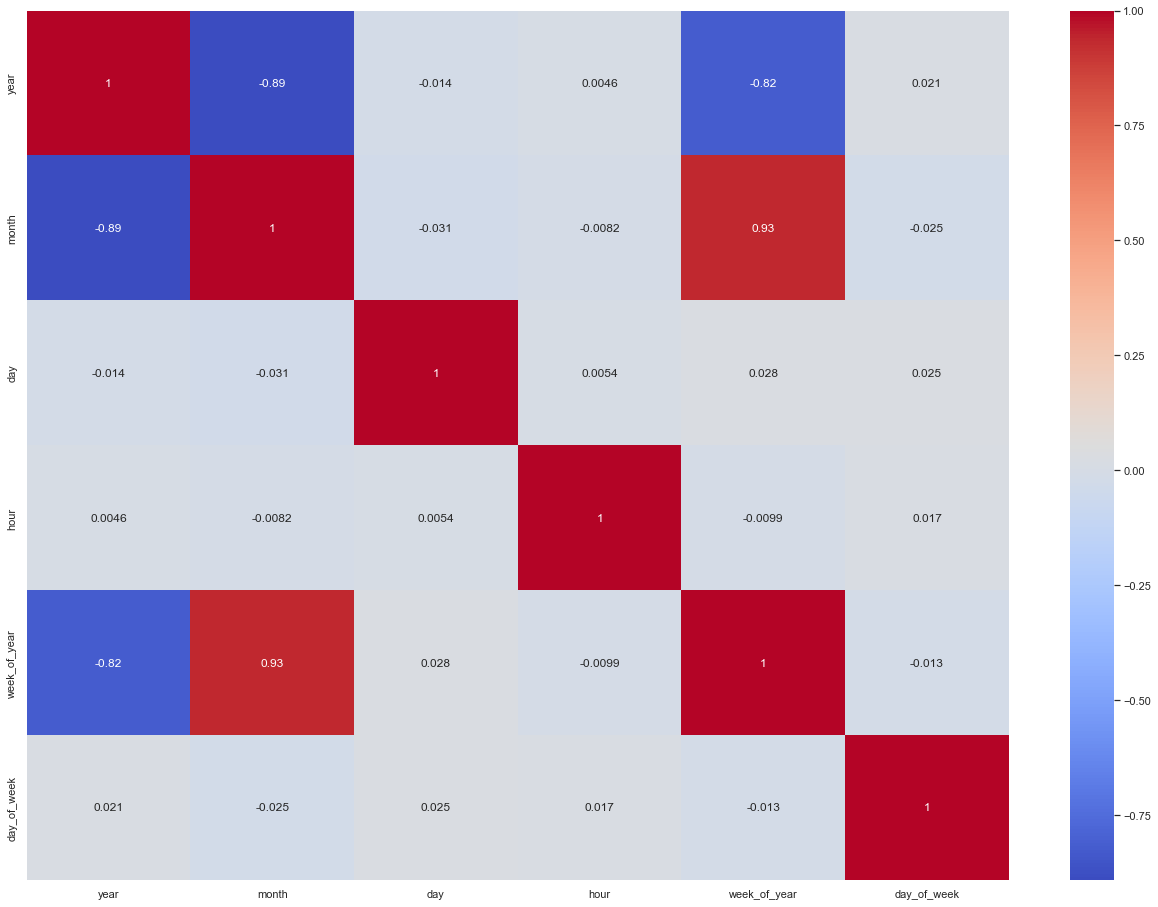

In [93]:
#correlation Analysis
plt.figure(figsize=(22,16))
cor=df.corr()
sns.heatmap(cor, cmap='coolwarm',annot=True)
plt.show()

In [94]:
# plotting histogram + KDE and boxplot for specified column
def plot_distribution(x, title=None):
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    sns.displot(x, ax=ax[0])
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=15)
    plt.tight_layout(pad=3.0)
    plt.show()

In [95]:
df.columns

Index(['account_id', 'event_type', 'year', 'month', 'day', 'hour',
       'week_of_year', 'day_of_week'],
      dtype='object')

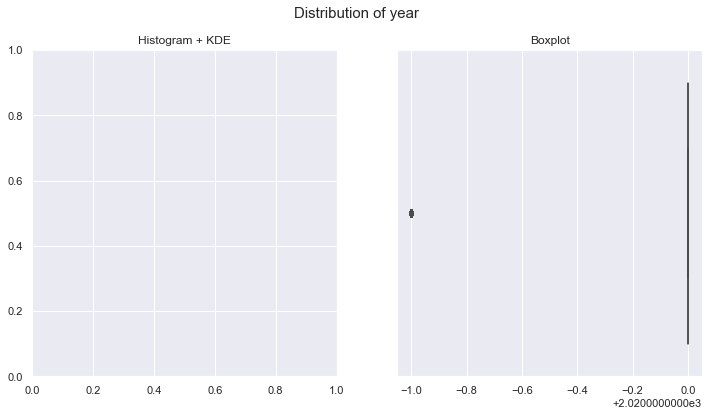

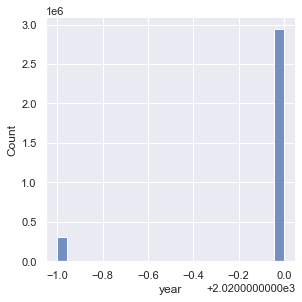

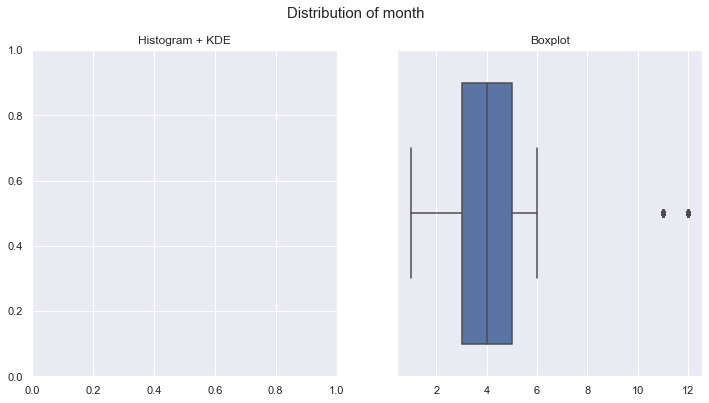

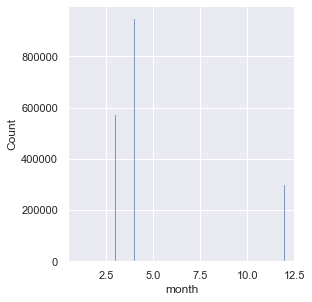

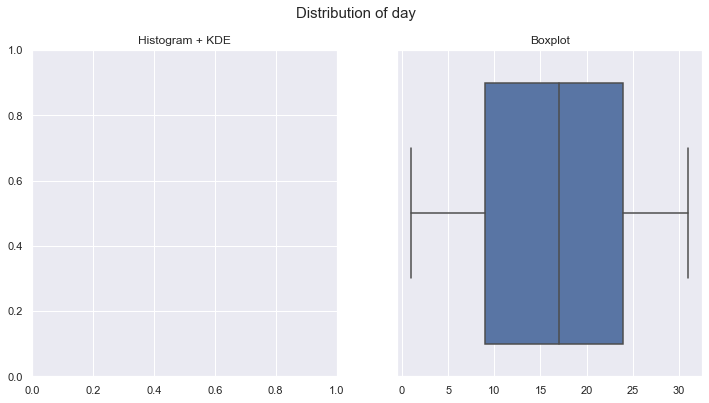

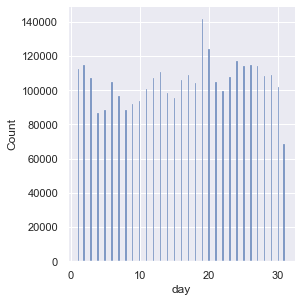

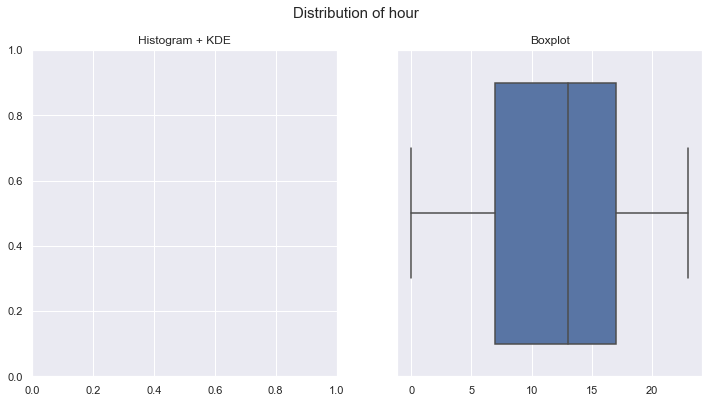

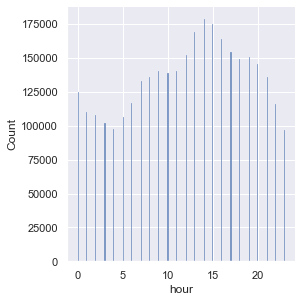

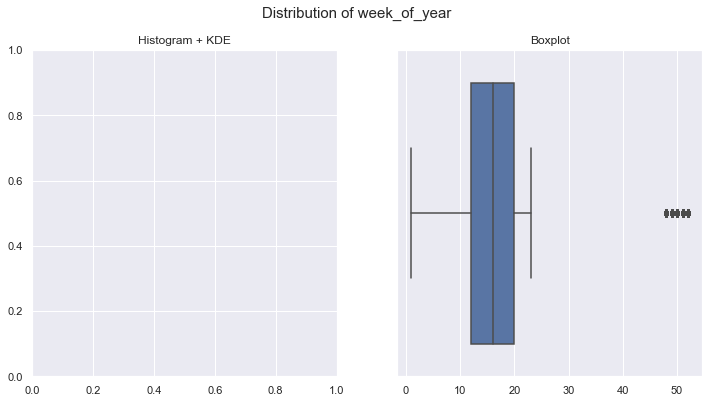

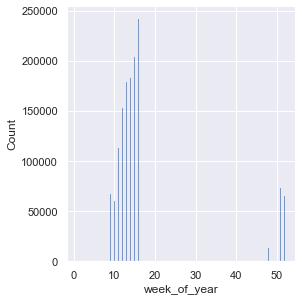

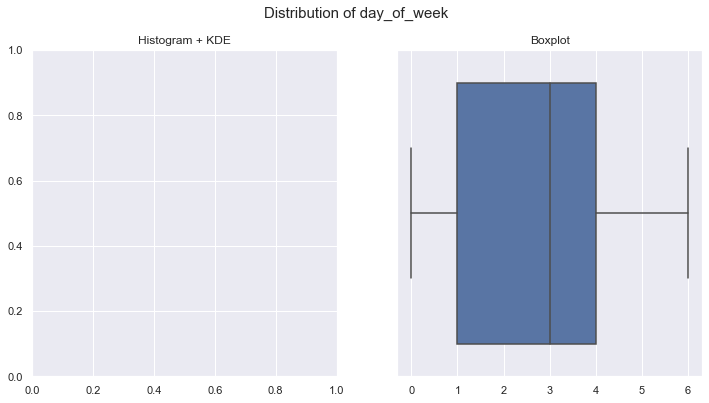

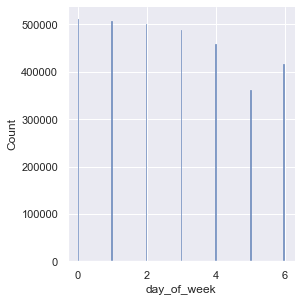

In [96]:
# univariate plots for numerical data

col=df[['year', 'month', 'day', 'hour',
       'week_of_year', 'day_of_week']]
for name in list(col):
    plot_distribution(df[name],title="Distribution of " + name)